## Koyuki Nakamori 2019/10/23

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate


from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE 
import string 
import pickle
#import muffnn
#from muffnn import MLPClassifier


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore") 
    
%matplotlib inline 

In [51]:
df=pd.read_csv('data/train.csv')

In [52]:
df.head(2)

outcome  categorical  numeric
0        0          3.0     41.0
1        0          1.0     41.0

In [53]:
df.info() #some null values  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
outcome        195 non-null int64
categorical    190 non-null float64
numeric        191 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.6 KB


In [54]:
df.describe()

outcome  categorical     numeric
count  195.000000   190.000000  191.000000
mean     0.605128     2.000000   52.178010
std      1.041893     0.690066    8.921868
min      0.000000     1.000000   33.000000
25%      0.000000     2.000000   45.000000
50%      0.000000     2.000000   52.000000
75%      1.000000     2.000000   58.000000
max      6.000000     3.000000   75.000000

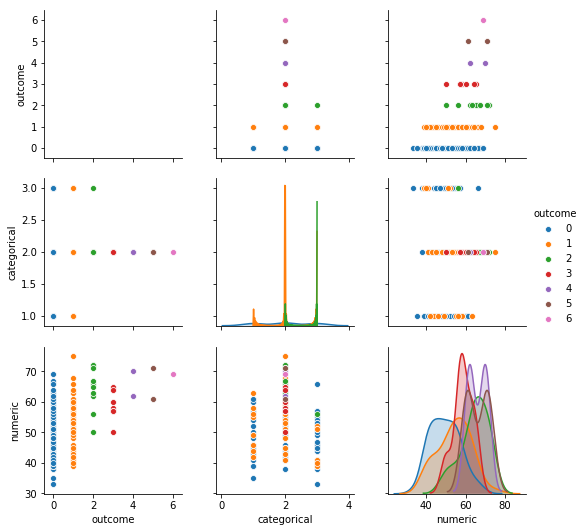

In [55]:
sns.pairplot(df.dropna(), hue='outcome') 

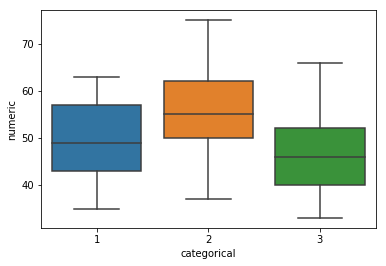

In [70]:
sns.boxplot(x='categorical', y='numeric', data=df)

In [69]:
df.groupby('categorical').numeric.mean()

categorical
1    50.022222
2    55.576515
3    46.403956
Name: numeric, dtype: float64

categorical
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
3    Axes(0.125,0.125;0.775x0.755)
Name: numeric, dtype: object

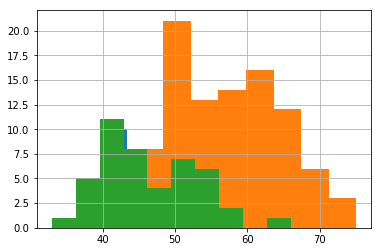

In [99]:
df.groupby('categorical').numeric.hist()  # category 2 is easy to tell but, 1 vs 3? 

In [149]:
bins = np.linspace(10, 80, 8)
print bins
df['num_bin'] = pd.cut(df['numeric'], bins) 

[10. 20. 30. 40. 50. 60. 70. 80.]


In [153]:
df.num_bin.unique()

[(40.0, 50.0], (50.0, 60.0], (30.0, 40.0], (60.0, 70.0], (70.0, 80.0]]
Categories (5, interval[float64]): [(30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0]]

In [150]:
df.groupby(['categorical', 'num_bin']).numeric.mean()

categorical  num_bin     
1.0          (50.0, 60.0]    52.17801
2.0          (30.0, 40.0]    40.00000
             (40.0, 50.0]    42.50000
3.0          (40.0, 50.0]    41.00000
Name: numeric, dtype: float64

In [ ]:
def fill_missing_categorical(n):
    
    if n > 48:  
        return 2 
    else: 
        return 1 

categorical
2    Axes(0.125,0.125;0.775x0.755)
Name: numeric, dtype: object

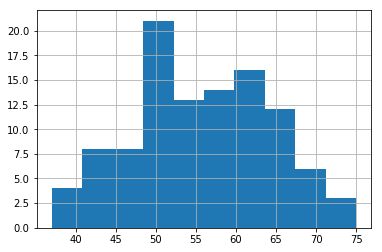

In [111]:
df[df.categorical.isin([2])].groupby('categorical').numeric.hist()

categorical
1    Axes(0.125,0.125;0.775x0.755)
Name: numeric, dtype: object

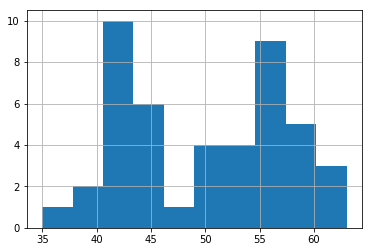

In [103]:
df[df.categorical.isin([1])].groupby('categorical').numeric.hist()

categorical
3    Axes(0.125,0.125;0.775x0.755)
Name: numeric, dtype: object

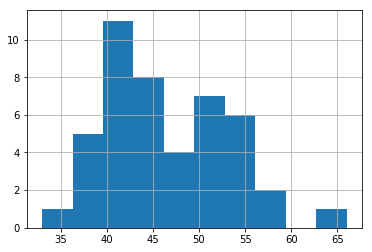

In [104]:
df[df.categorical.isin([3])].groupby('categorical').numeric.hist()

In [112]:
def fill_missing_categorical(n): # we can spend more time on inference category based on numeric 
    
    if n > 48:  
        return 2 
    else: 
        return 1 

In [131]:
df.groupby('categorical').numeric.mean()

categorical
1.0    52.178010
2.0    41.666667
3.0    41.000000
Name: numeric, dtype: float64

In [132]:
def fill_missing_numeric(n): # we can spend more time on inference category based on numeric 
    
    if n==1:  
        return 52.18 
    elif n==2: 
        return  41.67
    else: 
        return 41.00

In [120]:
#df.fillna(df.mean, inplace=True) # can later dig deeper for null values  
import math 
df['numeric'] = df['numeric'].fillna((df.dropna().groupby('categorical')['numeric'].mean())) 
df['categorical'] = df.apply(lambda x: fill_missing_categorical(x['numeric']) if math.isnan(x['categorical']) else x['categorical'], axis=1  )

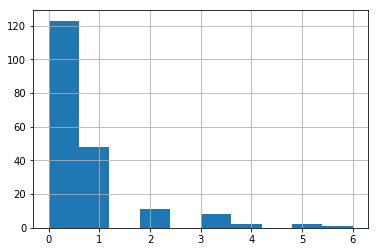

In [57]:
df.outcome.hist()

In [121]:
X=df[['numeric', 'categorical']]
y=df.outcome

In [122]:
# sm= SMOTE(random_state=42 , k_neighbors=2) 
# X_res, y_res = sm.fit_sample(X, y) # with more data points we can use SMOTE

In [123]:
# standarize features 
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [135]:
def fit_model(Model, X, y): 
    
    model= Model()
    model.fit(X, y)  
    y_pred= model.predict(X)

    cv_results = cross_validate(model, X, y, cv=3)
    print model
    print 
    print '----cv results-----------'
    print cv_results  
    print 
    print '----confusion_matrix-----'
    print confusion_matrix(y, y_pred) 
    print 
    print '----classification_report-----'
    print classification_report(y, y_pred)
    return model 

In [136]:
lg= fit_model(LogisticRegression,  X, y)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

----cv results-----------
{'score_time': array([0.00024891, 0.00022507, 0.00021601]), 'test_score': array([0.6119403 , 0.62121212, 0.64516129]), 'train_score': array([0.640625  , 0.63565891, 0.65413534]), 'fit_time': array([0.00093412, 0.00086904, 0.00085711])}

----confusion_matrix-----
[[119   4   0   0   0   0   0]
 [ 45   2   1   0   0   0   0]
 [  5   6   0   0   0   0   0]
 [  7   1   0   0   0   0   0]
 [  1   1   0   0   0   0   0]
 [  1   1   0   0   0   0   0]
 [  0   1   0   0   0   0   0]]

----classification_report-----
             precision    recall  f1-score   support

          0       0.67      0.97      0.79       123
          1       0.12      0.04      0.06        48
          2       0.00      0.00   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
rf=fit_model(RandomForestClassifier,  X, y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

----cv results-----------
{'score_time': array([0.00086284, 0.000808  , 0.00080109]), 'test_score': array([0.59701493, 0.59090909, 0.41935484]), 'train_score': array([0.7890625 , 0.73643411, 0.77443609]), 'fit_time': array([0.02308607, 0.0184629 , 0.01832604])}

----confusion_matrix-----
[[109   7   1   6   0   0   0]
 [ 21  21   1   5   0   0   0]
 [  4   1   3   2   0   1   0]
 [  0   2   0   6   0   0   0]
 [  1   0   0   0   1   0   0]
 [  0   1   0   0   0   1   0]
 [  1   0   0   0   0   0   0]]

----classification_report-----
             precision    recall  f1-sc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
gb= fit_model(GradientBoostingClassifier,  X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

----cv results-----------
{'score_time': array([0.0007689 , 0.00088716, 0.00085115]), 'test_score': array([0.59701493, 0.57575758, 0.38709677]), 'train_score': array([0.796875  , 0.74418605, 0.79699248]), 'fit_time': array([0.22961307, 0.27027893, 0.25900793])}

----confusion_matrix-----
[[114   6   1   1   0   0   1]
 [ 25  21   0   2   0   0   0]
 [  5   1   3   1   0   1   0]
 [  3   2   0   3   0   0   0]
 [  1   0   0   0   1   0   0]
 [  0   1   0   0   0   1   0]
 [  0   0   0   0   0   0   1]]

----classification_r

### Gradient boost would be the winning model 

##  Make prediction  

In [67]:
df_submission=pd.read_csv('data/test.csv')

In [68]:
df_submission

categorical  numeric
0          NaN     71.0
1          3.0     75.0
2          NaN     71.0
3          1.0      NaN
4          2.0     73.0

In [130]:
df.groupby('categorical').numeric.mean()

categorical
1.0    52.178010
2.0    41.666667
3.0    41.000000
Name: numeric, dtype: float64

In [134]:
df_submission['numeric']=df_submission.apply(lambda x: fill_missing_numeric(x['categorical']) if math.isnan(x['numeric']) else x['numeric'], axis=1 )
df_submission['categorical']= df_submission.apply(lambda x: fill_missing_categorical(x['numeric']) if math.isnan(x['categorical']) else x['categorical'], axis=1  )

In [140]:
df_submission['output']=gb.predict(df_submission)

In [141]:
df_submission.to_csv('test_predicted.csv', index=False)

## Next Steps: 
### Research on how to treat missing values 
### With more data, we can balance out the classes 